In [1]:
'''
Comp551: Assignment 1: Question 1

@author: Anand Kamat
@id: 260773313
'''
#Importing Packages
import numpy as np
import csv
from numpy.linalg._umath_linalg import inv
import matplotlib.pyplot as plt
from numba.tests.npyufunc.test_ufunc import dtype
import math

In [2]:
################ Question 1: Model Selection ####################################################

#Datasets
X_train = []
X_train_label = []
X_valid = []
X_valid_label = []
X_test = []
X_test_label = []


In [3]:
####
#    Loading Datasets
####

#Loading training data
with open('./Datasets/Dataset_1_train.csv', 'rb') as csv_file:
    raw_train = csv.reader(csv_file, delimiter = ',')
    for data in raw_train:
        X_train.append(float(data[0]))
        X_train_label.append(float(data[1]))
    del(data)    
     
#Loading validation data        
with open('./Datasets/Dataset_1_valid.csv', 'rb') as csv_file2:
    raw_valid = csv.reader(csv_file2, delimiter = ',')
    for data in raw_valid:
        X_valid.append(float(data[0]))
        X_valid_label.append(float(data[1]))
    del(data)
   
#Loading test data     
with open('./Datasets/Dataset_1_test.csv', 'rb') as csv_file3:
    raw_test = csv.reader(csv_file3, delimiter = ',')
    for data in raw_test:
        X_test.append(float(data[0]))
        X_test_label.append(float(data[1]))
    del(data)

In [4]:
###########################Creating polynomial fit input array################################################
X_train_poly = []
X_valid_poly = []
#Creating Matrix X for 20 deg polynomial
for i in range(0,21):
    #Adding bias term into the matrix
    if i is 0:
        X_train_poly = np.ones(len(X_train))
        X_valid_poly = np.ones(len(X_valid))
        X_test_poly = np.ones(len(X_test))
    else:
        X_train_poly = np.vstack((X_train_poly, np.power(X_train ,i)))
        X_valid_poly = np.vstack((X_valid_poly, np.power(X_valid ,i)))
        X_test_poly = np.vstack((X_test_poly, np.power(X_test ,i)))


In [5]:
#Transforming the training and validation set to appropriate dimension 
X_train_poly = np.transpose(X_train_poly)
X_valid_poly = np.transpose(X_valid_poly)
X_test_poly = np.transpose(X_test_poly)

In [6]:
#Calculating parameters when degree is 20
param = np.dot(np.dot(inv(np.dot(np.transpose(X_train_poly),  X_train_poly)), np.transpose(X_train_poly)) , (X_train_label))
#Calculating Training Mean Squared Error
prediction_train = np.dot(X_train_poly, param)
squared_sum = 0
 
for i in range(0, len(prediction_train)):
    squared_sum += ((prediction_train[i] - X_train_label[i])**2)
     
training_mse = (squared_sum)/(len(prediction_train))    
print(training_mse)

6.47474257381


In [7]:
#Calculating Validation Mean Squared Error
prediction_valid = np.dot(X_valid_poly, param)
squared_sum = 0
 
for i in range(0, len(prediction_valid)):
    squared_sum += ((prediction_valid[i] - X_valid_label[i])**2)
     
validation_mse = (squared_sum)/(len(prediction_valid)) 
print(validation_mse)

1422.05475784


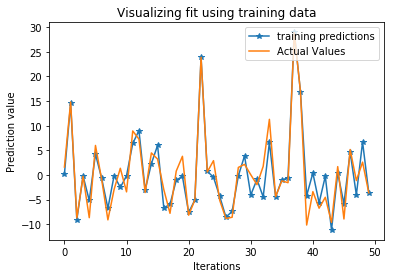

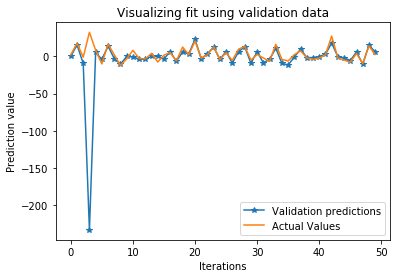

In [21]:
#Plotting the graph for training data
plt.plot(prediction_train, marker='*', label = "training predictions")
plt.plot(X_train_label, label = "Actual Values")
plt.legend(loc = 1)
plt.xlabel('Iterations')
plt.ylabel('Prediction value')
plt.title('Visualizing fit using training data')
plt.show()
#plt.savefig("Fig1")

#Plotting the graph for validation data
plt.plot(prediction_valid, marker='*', label = "Validation predictions")
plt.plot(X_valid_label, label = "Actual Values")
plt.legend(loc = 4)
plt.xlabel('Iterations')
plt.ylabel('Prediction value')
plt.title('Visualizing fit using validation data')
plt.show()
#plt.savefig("Fig2")


In [9]:
###
#Adding Regularization to the model
##

###########Calculating Training Mean Squared Error and Validation Mean Squared Error for various values of the Regularizing parameter
training_regul_error = []
validation_regul_error = []
lam_list = [] 
identity_matrix = np.identity(len(X_train_poly[0]), dtype = float)
for i in range(1,10000):
    lam = float(i)/10000
    lam_list.append(math.log(lam))
    
    #Updating parameters with regularization
    param_regul = np.dot(np.dot(inv(np.dot(np.transpose(X_train_poly),  X_train_poly) + lam*identity_matrix), np.transpose(X_train_poly)) , (X_train_label))    
    prediction_regul_train = np.dot(X_train_poly, param_regul)
    prediction_regul_valid = np.dot(X_valid_poly, param_regul)
    squared_train_sum = 0
    squared_valid_sum = 0
      
    for i in range(0, len(prediction_regul_train)):
        squared_train_sum += ((prediction_regul_train[i] - X_train_label[i])**2)

        
    for i in range(0, len(prediction_regul_valid)):
        squared_valid_sum += ((prediction_regul_valid[i] - X_valid_label[i])**2)
          
    training_regul_mse = (squared_train_sum)/(len(prediction_train))
    training_regul_error.append(float(training_regul_mse))  
    
    validation_regul_mse = (squared_valid_sum)/(len(prediction_regul_valid))
    validation_regul_error.append(float(validation_regul_mse))


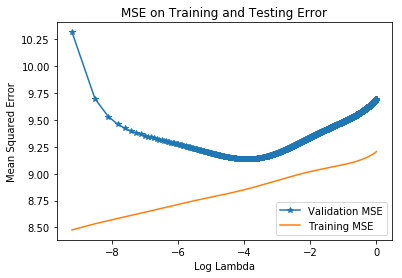

Value best Lambda: 0.0197


In [24]:
#Plotting MSE for various values of lambda

plt.plot(lam_list, validation_regul_error, marker='*', label = "Validation MSE")
plt.plot(lam_list, training_regul_error, label = "Training MSE")
plt.legend(loc = 4)
plt.xlabel('Log Lambda')
plt.ylabel('Mean Squared Error')
plt.title('MSE on Training and Testing Error')
plt.show() 

lambda_value = math.exp(lam_list[validation_regul_error.index(min(validation_regul_error))])
lambda_str = "Value best Lambda: " + str(lambda_value)
print(lambda_str)


In [11]:
#Testing Error
#Updating parameters with regularization
param_regul = np.dot(np.dot(inv(np.dot(np.transpose(X_train_poly),  X_train_poly) + lambda_value*identity_matrix), np.transpose(X_train_poly)) , (X_train_label))    

prediction_train_best = np.dot(X_train_poly, param_regul)
prediction_valid_best = np.dot(X_valid_poly, param_regul)


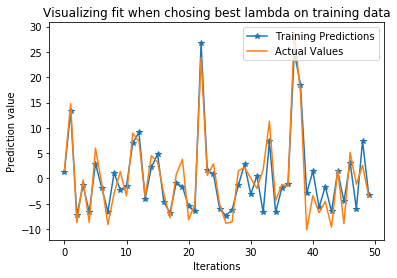

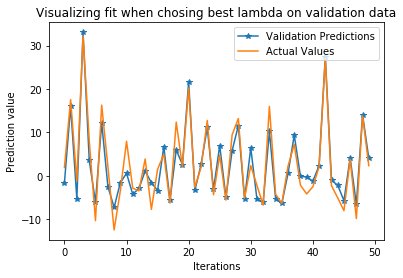

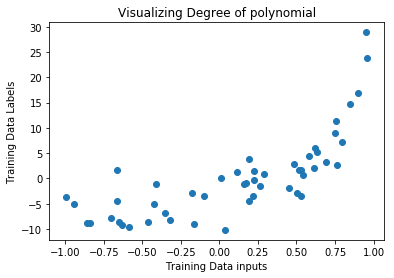

In [29]:
#Plotting the graph for training data
plt.plot(prediction_train_best, marker='*', label = "Training Predictions")
plt.plot(X_train_label, label = "Actual Values")
plt.legend(loc = 1)
plt.xlabel('Iterations')
plt.ylabel('Prediction value')
plt.title('Visualizing fit when chosing best lambda on training data')
plt.show()

#Plotting the graph for validation data
plt.plot(prediction_valid_best, marker='*', label = "Validation Predictions")
plt.plot(X_valid_label, label = "Actual Values")
plt.legend(loc = 1)
plt.xlabel('Iterations')
plt.ylabel('Prediction value')
plt.title('Visualizing fit when chosing best lambda on validation data')
plt.show()

plt.scatter(X_train, X_train_label)
plt.xlabel('Training Data inputs')
plt.ylabel('Training Data Labels')
plt.title('Visualizing Degree of polynomial')
plt.show()

In [13]:
prediction_regul_test = np.dot(X_test_poly, param_regul)
squared_test_sum = 0
    
for i in range(0, len(prediction_regul_test)):
    squared_test_sum += ((prediction_regul_test[i] - X_test_label[i])**2)
      
test_mse = (squared_test_sum)/(len(prediction_regul_test))

print_test = "Test MSE when lambda = " + str(lambda_value) + " is: " + str(test_mse)
print(print_test)

Test MSE when lambda = 0.0197 is: 10.7323010053
